In [15]:
import numpy as np
from NoCullingMultOutbreak import MultipleOutbreaks
Size = 20
start = 15
end = 25

In [16]:
#Generate clustered points
def clusters(init_pt,deviation,num_additional):
    import random
    source = [1,3]

    deviationFromPoint = deviation
    numberOfAdditionalPoints = num_additional
    xcoord = []
    ycoord = []
    for i in range(num_additional):
        newx, newy = [init_pt[i] + random.random() * deviation for i in range(2)]
        xcoord.append(newx)
        ycoord.append(newy)
    return(xcoord,ycoord)
import numpy as np
x1,y1 = clusters([1,3],7,150)
x2,y2 = clusters([10,11],7,150)
x3,y3 = clusters([5,13],7,150)
x4,y4 = clusters([11,4],7,150)
x = np.r_[x1,x2,x3,x4]
y = np.r_[y1,y2,y3,y4]

#Check if points are out of range
ind1 = []
ind2 = []
for i in range(599):
    ind1.append(np.logical_or(x[i]<0, x[i]>20))
    ind2.append(np.logical_or(y[i]<0, y[i]>20))
print(np.sum(ind1),np.sum(ind2))

0 0


In [17]:
N = len(x)
farms = list(range(1,len(x)-1))
first,last = MultipleOutbreaks(x=x,y=y,Num_outbreaks = 25,N = len(x), Size = 20, Y0 = 1, farms = farms, start = start, end = end)

In [18]:
#WHAT PROPORTION OF FARMS HAVE NONZERO RISK OF INFECTION DURING THAT TIMEFRAME
import numpy as np
print(np.sum(first[:,1]>0)/len(first[:,1]))
print(np.sum(last[:,1]>0)/len(last[:,1]))

0.224080267559
0.988294314381


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/sandyalakkur/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


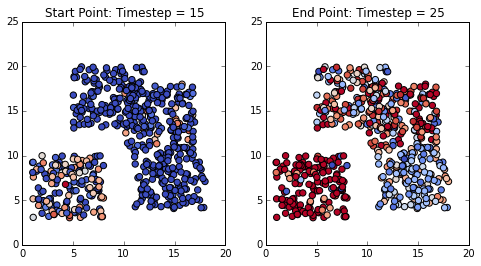

In [20]:
#BLUE = LOW RISK, WHITE = MEDIUM RISK, RED = HIGH RISK
#plt.plot(x[farms],y[farms],'r.')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(x[farms], y[farms], s=40, linewidths=1, c=first[:,1], cmap=plt.cm.coolwarm)
plt.title('Start Point: Timestep = %d ' %start)

plt.subplot(1,2,2)
plt.scatter(x[farms], y[farms], s=40, linewidths=1, c=last[:,1], cmap=plt.cm.coolwarm)
plt.title('End Point: Timestep = %d' %end)

Instead of generating points uniformly around source points, try generating points around a source point via a bivariate normal

86 13


/Users/sandyalakkur/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


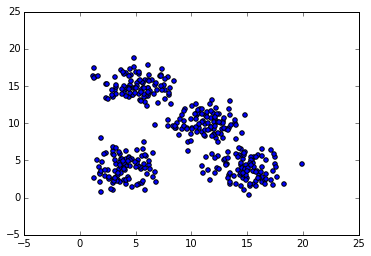

In [43]:
import matplotlib.pyplot as plt
mean1 = [4, 4]
cov1 = [[2, 0], [0, 2]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
mean2 = [11, 10]
cov2 = [[3, 0], [0, 2]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
mean3 = [5, 15]
cov3 = [[3, 0], [0, 2]]
x3, y3 = np.random.multivariate_normal(mean3, cov3, 100).T
mean4 = [15, 4]
cov4 = [[3, 0], [0, 2]]
x4, y4 = np.random.multivariate_normal(mean4, cov4, 100).T

x = np.r_[x1,x2,x3,x4]
y = np.r_[y1,y2,y3,y4]

for i in range(len(x)):
    ind1.append(np.logical_or(x[i]<0, x[i]>20))
    ind2.append(np.logical_or(y[i]<0, y[i]>20))
print(np.sum(ind1),np.sum(ind2))

for i in range(len(x)):
    if np.logical_or(x[i]<0, x[i]>20):
        x[i] = np.random.rand(1)*20
    if np.logical_or(y[i]<0, y[i]>20):
        y[i] = np.random.rand(1)*20
plt.scatter(x, y)
plt.axis([-5,25,-5,25])
plt.show()

In [47]:
N = len(x)
farms = list(range(1,N-1))
first,last = MultipleOutbreaks(x=x,y=y,Num_outbreaks = 100,N = N, Size = 20, Y0 = 1, farms = farms, start = start, end = end)

In [48]:
#WHAT PROPORTION OF FARMS HAVE NONZERO RISK OF INFECTION DURING THAT TIMEFRAME
import numpy as np
print(np.sum(first[:,1]>0)/len(first[:,1]))
print(np.sum(last[:,1]>0)/len(last[:,1]))

0.281407035176
0.997487437186


[-5, 25, -5, 25]

/Users/sandyalakkur/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


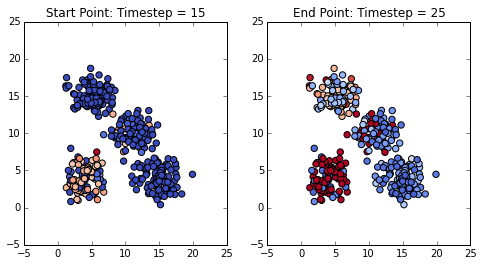

In [50]:
#BLUE = LOW RISK, WHITE = MEDIUM RISK, RED = HIGH RISK
#plt.plot(x[farms],y[farms],'r.')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(x[farms], y[farms], s=40, linewidths=1, c=first[:,1], cmap=plt.cm.coolwarm)
plt.title('Start Point: Timestep = %d ' %start)
plt.axis([-5,25,-5,25])

plt.subplot(1,2,2)
plt.scatter(x[farms], y[farms], s=40, linewidths=1, c=last[:,1], cmap=plt.cm.coolwarm)
plt.title('End Point: Timestep = %d' %end)
plt.axis([-5,25,-5,25])